Nik Alleyne
www.securitynik.com

I wanted to take a second to really sit and read the chapter on convolutional neural networks in the book 
Deep Learning from: https://www.deeplearningbook.org/contents/convnets.html

Below basically represents my notes.

* Image data can be considered as a 2D grid of examples
* Convolutional networks uses a mathematical operation called a convolution. A specialized kind of linear operation
* Convolutional networks are the same as neural net. The difference is, convolutional networks uses a convolution operation instead of matrix multiplication
* Almost all convolutional networks apply a pooling mechanism. 
* Convolution networks stands out as an example of neuroscientific principles influencing deep learning
* The convolution operation is typically denoted with an '*' that is asterisk

* Convolution like all operation starts with an input. Typically denoted by "X"
* We then have the kernel or filter as some may call it
* The output to the convolution process is often called the feature map or some might say activation map as it is the result of what comes out of the activation layer.

* The kernel is usually a multi-dimensional array of parameters that is adapted/learned by the algorithm
* Convolutions are commutative. That is the give the same results whatever order the values are in.
* Cross correlation is the same as convolution. Except the kernel is not flipped. Most neural network libraries implement this cross correlation.
* Many machine learning libraries implement cross correlation but call it convolution

* It is rare for convolution to be used in machine learning alone
* Convolution usually corresponds to a very sparse matrix. 
* A Sparse Matrix is one in which most of the elements are 0
* We normally get a Sparse Matrix because the kernel is usually much smaller than the input image

* Convolution leverages 3 important ideas
    - Sparse interactions
        - Convolution networks usually have sparse interactions also called sparse connectivity or sparse weights
        - We get these sparse interactions by making the kernel smaller than the input
        - This also means we store fewer parameters. This reduces memory requirements of the model and improves statistical effeciency. It also means computing output requires fewer operations
        - The improvements in efficiency are usually quite large
        - In a deep convolution network, units in the deeper layer may interact with a larger portion of the input
        - Each building block describes sparse interaction
        - Convolution provides a mean of working with inputs of varying sizes
        - Traditional neural networks use matrix multiplication. This also means every output unit interacts with every input unit

    - Parameter sharing
        - Parameter sharing refers to using the same parameters for more than one functions in a model
        - The receptive field of the the deeper layers is larger than the receptive field of the shallow layers
        - While direct connections in a convnet is very sparse units in the deeper layers can indirectly connect to most of the input image 
        - Another way of talking about parameter sharing is to say the network has tied weights. This is because the value of the weight applied to one input is the value that is applied everywhere
        - Because of parameter sharing, instead of learning a set of parameters for each position, we just learn one set

        - Recall K the kernel is usually several orders of magnitude smaller than M
        - Convolution is dramatically more efficient in terms of memory requirements than dense matrix multiplication and statistical efficiency 
        - Convolution is an extremely efficient way for describing transformations. It does this by performing the same linear transformation by looking at small local regions across an entire image

    - Equivariance
        - Because of parameter sharing, we end up with equivariance
        - To say a function is equivariant, means as the input changes, the output changes the same way
        - Convolution creates a 2D map of where certain features appear in the input
        - If we move a object in the input, its representation will move the same in the output
        - When processing images, it is useful to detect images in the first layer of the convolution
        - Keep in mind that convolution may not be equivariant to some transformations, such as changes in the scale or rotation of an image

In [1]:
import tensorflow as tf

In [2]:
# my current version of tensorflow
tf.__version__

'2.12.0'

In [3]:
# Set the random seed for repeatability
tf.random.set_seed(seed=5)

# Generate a grayscale image to be used as input to the convolution network
x = tf.random.normal(shape=(1,4,4,1), mean=0, stddev=1)
x

<tf.Tensor: shape=(1, 4, 4, 1), dtype=float32, numpy=
array([[[[-0.18030666],
         [-0.95028627],
         [-0.03964049],
         [-0.7425406 ]],

        [[ 1.3231523 ],
         [-0.61854804],
         [ 0.8540664 ],
         [-0.08899953]],

        [[ 2.4488697 ],
         [ 0.762508  ],
         [ 1.2659615 ],
         [ 0.9801489 ]],

        [[ 1.5293121 ],
         [-0.57500345],
         [ 0.8987044 ],
         [-1.250801  ]]]], dtype=float32)>

In [4]:
# What does this image look like
import matplotlib.pyplot as plt

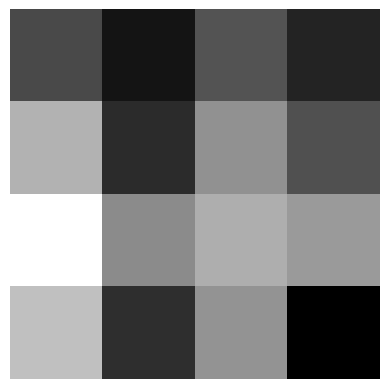

In [5]:
# Plot the input image
plt.imshow(tf.squeeze(input=x), cmap='gray')
plt.axis('off');

In [6]:
# Setup the convolution layer with 'valid'/no padding.
# Also disable bias
conv_layer = tf.keras.layers.Conv2D(filters=1, kernel_size=(2,2), strides=(1,1), padding='valid', use_bias=False)
conv_layer

In [7]:
# Apply the convolution on x
x_convolved = conv_layer(x)
x_convolved

<tf.Tensor: shape=(1, 3, 3, 1), dtype=float32, numpy=
array([[[[-0.04605138],
         [ 0.6855722 ],
         [ 0.14143151]],

        [[ 0.9273815 ],
         [ 1.5698352 ],
         [ 0.8832721 ]],

        [[-0.5070307 ],
         [ 0.39735252],
         [-0.790917  ]]]], dtype=float32)>

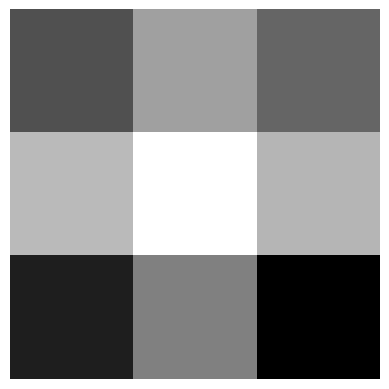

In [8]:
# Plot the image after the convolution operation
plt.imshow(tf.squeeze(input=x_convolved), cmap='gray')
plt.axis('off');

In [9]:
# Pass the convolution operation through a non-linear activation, such as ReLU
# This stage is sometimes called the detector stage
x_relu = tf.keras.activations.relu(x=x_convolved)
x_relu

<tf.Tensor: shape=(1, 3, 3, 1), dtype=float32, numpy=
array([[[[0.        ],
         [0.6855722 ],
         [0.14143151]],

        [[0.9273815 ],
         [1.5698352 ],
         [0.8832721 ]],

        [[0.        ],
         [0.39735252],
         [0.        ]]]], dtype=float32)>

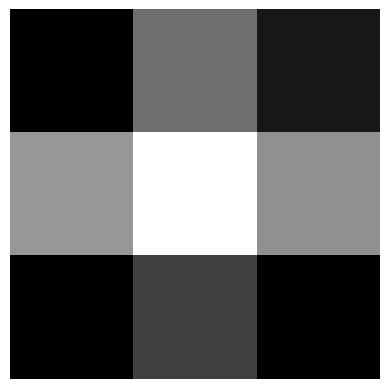

In [10]:
# Plot the image after passing through the RelU operation
plt.imshow(tf.squeeze(input=x_relu), cmap='gray')
plt.axis('off');

* A typical convolution network consists of 3 stages
    - Perform the convolution operation in parallel to output a set of linear activations
    - Each linear activation is run through a set of non-linear activation - This is the feature detector stage
    - Pass through a pooling layer

* The pooling layer replaces the output of the net at a certain location with a summary statistics of the nearby pixels
* There are various pooling mechanisms. While Max pooling is common, there are also:
    - Average
    - L2 norm
    - Weighted average, etc.
* Pooling helps to make the representation approximately invariant to small translations of the input
    - Invariant to translations means that as we make small translations on the input, most of the pooled outputs do not change
    - Invariant to local translation can be an important property if we are more concerned about whether or not a feature is present, rather than where it is.
* Think about pooling as adding a very strong prior that the function the layer learns must be invariant to small translations
* Because pooling summarizes the responses over a neighbourhood, it is possible to use fewer pooling units than detector units
* For many tasks, pooling is important to handle inputs of varying sizes
* It is also possible to dynamically pool features together
* You can learn a single pooling structure that is applied to all images
* Convolutions contain local interactions
* Pooling makes each unit invariant to small changes
* Do keep in mind, convolution and pooling can cause underfitting
* Some convolution networks are designed to use pooling on some channels and not on others
* Pooling on all features can increase training error


In [11]:
# Setup the Maxpool layer
pool_layer = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(1,1), padding='valid')
pool_layer

In [12]:
# Apply the pool layer to the x_convolved
x_pool_convolved = pool_layer(x_convolved)
x_pool_convolved

<tf.Tensor: shape=(1, 2, 2, 1), dtype=float32, numpy=
array([[[[1.5698352],
         [1.5698352]],

        [[1.5698352],
         [1.5698352]]]], dtype=float32)>

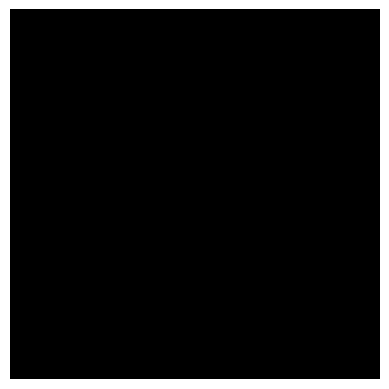

In [13]:
# Visualize the image after maxpool
# Remember, we already performed convolution, then relu, now this is the pooled output visualize
plt.imshow(tf.squeeze(input=x_pool_convolved), cmap='gray')
plt.axis('off');

* When talking about convolution in neural networks, we are actually talking about a many convolution operation in parallel
* Convolution with a single kernel can extract only one kind of feature
* Usually we want to learn many minds of features at many locations
* When working with images, we usually think of input and output of the convolution as 3-D Tensors.
    - One index into different channels
    - Two indicies into the spatial coordinates
* Software implementation usually work in batch mode, hence the need for a 4-D tensor
    - The 4th index in the 4-D tensor indexes different examples in the batch
* You may want to skip over some position of the kernel to reduce computational cost. 
    - This will result in the features not being extracted as finely
    - Think of this as downsampling the output from the full convolution

* An essential feature of convolution network is the ability to 0 pad the input to make it wider
    - Without this, the width of the representation shrinks by one pixel less than the kernel width at each layer
* Zero padding allows us to control the kernel width and size of the output independently
* With Zero padding, we are forced to choose between shrinking spatial extent of the network rapidly or using small kernel sizes;
    - These scenarios limit the expressiveness power of the network

* Three special cases of zero-padding to be aware of
    - No zero-padding is used whatsoever
        - In this case, the kernel is only allowed to visit positions where the entire kernel is part of the image.
        - In MATLAB this is called "valid" convolution.
        - All pixels in the input are a function of the same number of pixels in the output
        - The behaviour of the output is somewhat more regular
        - The size of the output shrinks at each layer
        - If the image has m and the kernel has k, the output will be (m-k) + 1
        - Keep in mind, the rate of this shrinkage can be dramatic if the kernels used are large
        - This formula was used above but just re-implementing the convolution here to keep this close
        - Since the shrinkage is greater than 0, it limits the number of convolution layers that can be included in the network
        - As layers are added, the spatial dimenssion of the network will drop to 1x1. At this point the additional layers cannot be meaningfully be considered as convolutional

In [14]:
# Generate a grayscale image to be used as input to the convolution network
x = tf.random.normal(shape=(1,4,4,1), mean=0, stddev=1)
x

<tf.Tensor: shape=(1, 4, 4, 1), dtype=float32, numpy=
array([[[[ 0.22652863],
         [ 0.8106553 ],
         [ 0.7466094 ],
         [ 0.7749703 ]],

        [[ 0.72448725],
         [ 1.4217405 ],
         [-0.08917825],
         [ 1.3464464 ]],

        [[-1.0210733 ],
         [ 0.00945171],
         [ 1.1596327 ],
         [ 2.112795  ]],

        [[-0.7126439 ],
         [ 0.18847999],
         [-1.5376697 ],
         [ 0.10964595]]]], dtype=float32)>

* since m = 4*4
* k -> I will usee 2*2
* Then the expected output will be 
(4-2) + 1
* Hence I expect a 3*3 output when convolution is used with zero padding
* Keep in mind also 4*4 means we are using a squared input and a squared (2*2) kernel, hence the output will be squared

In [15]:
# Setup the convolution layer with a "valid" padding
conv_layer = tf.keras.layers.Conv2D(filters=1, kernel_size=(2,2), strides=(1,1), padding='valid', use_bias=False)
conv_layer

In [16]:
# Apply the convolution layer to the data
# This confirms the formula as the 3*3 output is returned from the convolution
conv_layer(x)

<tf.Tensor: shape=(1, 3, 3, 1), dtype=float32, numpy=
array([[[[-0.5311336 ],
         [-0.07642531],
         [-1.2824504 ]],

        [[-2.2117934 ],
         [-0.80753833],
         [-0.64058554]],

        [[ 0.00346658],
         [-0.6044576 ],
         [-3.3563366 ]]]], dtype=float32)>

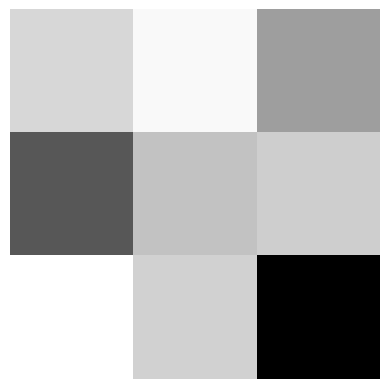

In [17]:
# Plot the convolved image
plt.imshow(tf.squeeze(input=conv_layer(x)), cmap='gray')
plt.axis('off');

* Another type of zero-padding is what MATLAB calls "same"
* With same, just enough zero padding is added to keep the size of the output equal to the size of the input
* With same, the network can contain as many convolution layers as your computing resources can accommodate
* The input pixels near the border influence fewer output pixels than the input pixels near the center
* This can make the border pixels somewhat underrepresented in the model.

In [18]:
# Setting up the image again, no need to but want to keep everything in one place
# Generate a grayscale image to be used as input to the convolution network
x = tf.random.normal(shape=(1,4,4,1), mean=0, stddev=1)
x

<tf.Tensor: shape=(1, 4, 4, 1), dtype=float32, numpy=
array([[[[ 1.4665463e+00],
         [-1.0248139e+00],
         [ 8.6743289e-01],
         [-2.2424309e+00]],

        [[ 8.9757569e-02],
         [-1.1256858e-01],
         [-1.6262239e-01],
         [-3.1064131e-04]],

        [[-2.0654018e+00],
         [ 9.5980637e-02],
         [-1.1647935e+00],
         [-5.9716773e-01]],

        [[-1.6130395e+00],
         [ 5.5149215e-01],
         [-2.1156819e+00],
         [ 1.2274351e+00]]]], dtype=float32)>

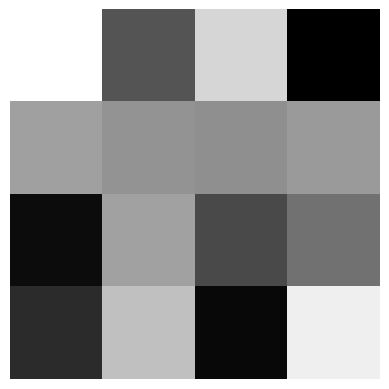

In [19]:
# plot the image
plt.imshow(X=tf.squeeze(input=x), cmap='gray')
plt.axis('off');

In [20]:
# Setup the convolution layer
# This time set the padding as "same"
conv_layer = tf.keras.layers.Conv2D(filters=1, kernel_size=(2,2), strides=(1,1), padding='same', use_bias=False)
conv_layer

In [21]:
# Apply the convolution to the input
# We can see that the shape remains the same
conv_layer(x)

<tf.Tensor: shape=(1, 4, 4, 1), dtype=float32, numpy=
array([[[[-0.75079936],
         [ 0.57298154],
         [-1.2844008 ],
         [ 0.09065959]],

        [[ 1.0716022 ],
         [-0.47635272],
         [ 0.46490642],
         [ 0.32238543]],

        [[ 1.1686014 ],
         [-1.5993603 ],
         [ 1.1830281 ],
         [-0.63851583]],

        [[ 0.39393207],
         [-1.2837753 ],
         [ 0.8172613 ],
         [-0.04953237]]]], dtype=float32)>

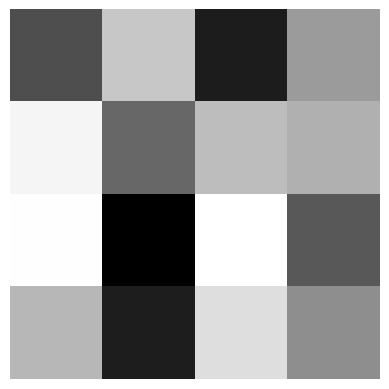

In [22]:
# Draw the convolved image with "same" padding
plt.imshow(X=tf.squeeze(input=conv_layer(x)), cmap='gray')
plt.axis('off');

* Because with "same" the border pixels maybe somewhat underrepresented
* Hence the next extreme is "full" convolution
* In "full" convolution, enough zeroes are added for every pixel to be visited k times in each direction
* This results in an output of (m-k) + 1
* This formula is the same for "valid" 
* Setting up the input again and testing "full"
* In this case, the output pixels near the border, are a function of fewer pixels than the output near the center
    - This makes it difficult to learn a kernel that could learn well at all positions in the feature map

In [23]:
# Generate a grayscale image to be used as input to the convolution network
x = tf.random.normal(shape=(1,4,4,1), mean=0, stddev=1)
x

<tf.Tensor: shape=(1, 4, 4, 1), dtype=float32, numpy=
array([[[[ 3.7002832e-02],
         [ 3.4592864e-01],
         [-4.1550454e-01],
         [-4.7053525e-01]],

        [[ 5.4535621e-01],
         [-7.4370003e-01],
         [-1.3551344e+00],
         [-2.1240716e+00]],

        [[-4.8964325e-01],
         [ 2.0177523e-03],
         [ 5.0929922e-01],
         [ 1.1176314e+00]],

        [[ 2.3943008e-01],
         [-1.2432196e-01],
         [ 9.6324652e-01],
         [-1.1959089e+00]]]], dtype=float32)>

In [24]:
# Setup the convolution layer with "full" padding
# Unfortunately, version'2.12.0' of tensorflow, does not support "full"
conv_layer = tf.keras.layers.Conv2D(filters=1, kernel_size=(2,2), strides=(1,1), padding='full', use_bias=False)
conv_layer


ValueError: The `padding` argument must be a list/tuple or one of "valid", "same" (or "causal", only for `Conv1D). Received: full

* Considering the different strategies, in terms of test set classification accuracy, the optimal padding is somewhere between "valid" and "same"

* There is also locally connected layers

* There is also "unshared convolution".
    - Similar to discrete convolution
    - uses a small kernel
    - parameters are not shared across locations


* There is also "Tiled convolution"
* Tiled is a compromise between a convolution layer and a locally connected layer
* Rather than learning a set of weights at every spatial location, a separate set of kernels is learned as we move through space.
* With this approach, immediate neighbors will have different filters, similar to locally connected layer
* Memory requirements for storing parameters are determined by the set of kernels rather than the output feature map

* The difference between "locally connected layers", "tiled convolution" and "standard convolution" lies in how they share parameters:
    - Locally connected has no sharing at all
        - Each connection has its own weight
    - Tiled convolution has a set of different kernels.
        - Neighbouring units in the output have different parameters
        - Like locally connected layer, neighbouring units in the output have different parameters.
        - Unlike locally connected layers, after going through all the available kernels, we cycle back to the first
        - If two output units are separated by multiple of "t" steps, then they share parameters
    - Traditional convolution is equivalent to tiled convolution with t=1
        - There is one kernel and it is applied everywhere

* In locally connected layer and tiled convolutional layers the detector units are driven by different filters.
* Convolutional layers are hardcoded to be invariant specifically to translation

* Other operations besides convolutions are necessary to implement a convolution network

* For learning to occur, you must compute the gradients with respect to the kernel, given the gradients with respect to the output
    - In some simple cases, the operation can be performed using convolution operation
    - Keep in mind, stride greater than 1 does not have this property

* Remember, convolution is a linear operation and can be described as a matrix multiplication. 
    - The input tensor must first be reshaped into a flat vector

* Convolution, backprop from output to weights and backprop from outputs to inputs are sufficient to compute all the gradients needed to compute all the gradients needed to train any depth of feedfoward networks, as well as convolution networks with reconstruction functions based on transposed convolution.

* Generally, convolution does not only use linear operations to transform the inputs to the outputs.
* We also add a bias term, before applying the non-linearity
    - Sharing parameters across the biases
        - For locally connected layer, it is natural to give each unit its own bias
        - For tiled convolution it is natural to share the biases with the same tiling pattern as the kernels
        - For convolutional layers, it is typical to have one bias per output and share it across all locations within each convolution map
        - It is also possible to learn a separate bias at each location of the output map, if the input is of known fixed-size
        - Separating the biases may slightly reduce the statistical efficiency of the model. It however, allows the image to correct for differences in the images statistics at different locations.
    - When using implicit zero padding, detector units at the edge of the image receive less total input and may need larger biases


In [25]:
# Looking to see what the convolution operation looks like when the bias is set
# Generate the network with all 0s
# Generate a grayscale image to be used as input to the convolution network
x = tf.zeros(shape=(1,4,4,1))
x

<tf.Tensor: shape=(1, 4, 4, 1), dtype=float32, numpy=
array([[[[0.],
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         [0.]]]], dtype=float32)>

In [26]:
# Setup the convolution to use bias
# Initialize the bias to zeros in this instance
conv_layer = tf.keras.layers.Conv2D(filters=1, kernel_size=(2,2), strides=(1,1), padding='valid', use_bias=True, bias_initializer='zeros')
conv_layer

In [27]:
# Apply to the data
# we see every value is still 0. This is because anything multiply by 0 will give 0
# The anything here is the weights being multiplied by the input which is 0
# Then when we add the bias which is 0, we still have 0
conv_layer(x)

<tf.Tensor: shape=(1, 3, 3, 1), dtype=float32, numpy=
array([[[[0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.]]]], dtype=float32)>

In [28]:
# Get the bias
conv_layer.bias.numpy()

array([0.], dtype=float32)

In [29]:
# Repeat the process, set the bias to ones
# Initialize the bias to ones
# With the weights initialize to ones, we can see it is broadcast throughout all the layers
# In this case 0*weights = 0 
# When we add 1 the bias, we get 1
conv_layer = tf.keras.layers.Conv2D(filters=1, kernel_size=(2,2), strides=(1,1), padding='valid', use_bias=True, bias_initializer='ones')
conv_layer(x)

<tf.Tensor: shape=(1, 3, 3, 1), dtype=float32, numpy=
array([[[[1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.]]]], dtype=float32)>

In [30]:
# Get the bias
conv_layer.bias.numpy()

array([1.], dtype=float32)

* Convolutional networks can be used to output a high dimensional structured object (tensor) rather than just predicting a class or a number as in regression
* This may result in the output plane being smaller than the input plane. 
* This type of architecture is typically used for classification of a single object in an image.
* Pooling layers with a large stride results in the largest reduction in spatial dimensions. 
    - Spatial dimensions refers to the width and height
* If you wish to have an output map the same size as the input, you can:
    - avoid using pooling all together
    - Emit a lower resolution grid of labels
    - Use a pool operator with a unit stride

* There is also a recurrent convolutional network
    - Can be used for pixel-wise labeling where a guess is made of the initial images labels
    - This initial guess is then refined using interactions between neighboring pixels
    - Repeating this process at every step uses the same convolutions at each stage, sharing weights between the last layers of the deep net.
    - Upon making a prediction for each pixel, further processing can be done to segement the image into regions.
    - The general is that large group of contiguous pixels tends to be associated with the same label.

* Convolution networks can also be applied to video
* Convolution networks can process inputs with varying dimensions.
    - These types of inputs cannot be used by traditional matrix multiplication-based neural networks.
    - The kernel is applied a number of times based on the input
    - The output is scaled appropriately
    - The use of convolution for processing variably sized inputs only makes sense only for input that have variable size because the contain varying amount of observations of the same thing.
    - Convolution does not make sense if the input has varying size. It may include different kids of observations

* Convolution is the equivalent to converting both the input and the kernel to the frequency domain using a Fourier Transform.
- We can go back from frequency domain to the time domain by leveraging the inverse Fourier Transform
- For some problem size this can be faster than discrete convolution
- Devising faster ways to perform convolution or approximate convolution without harming accuracy is an area of active researching.

* Typically the most expensive part of the convolution network training is learning the features at every step. We do both a backward and forward pass through the entire network.
* Gradient descent requires 
* After passing through several layers of pooling the output layer is typically relatively inexpensive because of the small number of features provided as input to this layer.
* One way to reduce the cost of convolution training, is to use features that are not trained in a supervised fashion.
* To get convolution kernels without supervised training, we can use one of the following strategies
    - Initialize the kernels randomly
        - Random kernels often works surprisingly well in convolution networks.
        - Layers consisting of convolution, followed by pooling naturally becomes frequency selective and translation invariant when assigned random weights
        - Ths provides an inexpensive way to choose the architecture of a convolutional network
    - Design the kernels by hand. For example, to detect edges at certain orientation or scale
    - Learn the kernels via an unsupervised criterion
        - For this we can leverage K-means unsupervised clustering to a small image patch, then use the learned centroids as convolution kernels
        - This means it is possible to use unsupervised learning to train a convolutional network, without ever using convolution during the training process.

* You may also try to learn features via a method that does not require full backward and forward propagation at every gradient step.
    - With this approach you can train very large models and incur high computational cost only at inference time

* While this approach was popular when labeled datasets were very small and computation power limited, today, most convolutional networks are trained in a supervised fashion.
    - They use the full forward and back-propagation through the entire network on each training iteration.


* Convolutional networks are probably the greatest success story of the biologically inspired artificial intelligence. 
* Some of the key design principles of convolution networks were drawn from neuroscience.

* Convolutional network have their features defined in terms of two-dimensional maps

* Convolution networks were some of the first networks to solve real world commercial problems.
* It is not clear why convolutional network were successful when general backpropagation networks were considered to have failed. 
* Convolutional networks are computationally more efficient than fully connected networks. Because you can run multiple experiements faster and tune tune their implementation and hyperparameters.
* Because convolutional networks has performed well decades ago, in many ways it has paved the way to acceptance of neural networks in general. 
* Convolutional networks provides a way to specialize neural networks to work with data that has a clear grid-like structure topology. Can also scale to very large models.
    - This has approach has been most successful on a 2-D image topology.


At this point I thought I learned enough on this topic but came across two links I thought I should read more   


This is the first of these links
https://pyimagesearch.com/2021/05/14/convolution-and-cross-correlation-in-neural-networks/

* CNNs do not use fully connected layer
* Each layer in a CNN applies a different set of filters, typically hundreds or thousands
* The results are then combined and fed into the next layer in the network
* As mentioned above, the values for the filters are learned via the training process
* CNNs may learn edges in the first layer
* From the edges it may learn "blobs" in the second layer
* The deeper layer may then be used to detect higher level features
* The last layer of the CNN uses these high level features to make predictions
* The concept of building higher level features from lower level ones is exactly why CNNs are so popular
* Convolution is the element wise multiplication of two matricies followed by the sum
* The two matricies must have the same dimensions
* Perform element wise multiplication, then add the values

In [31]:
import numpy as np

In [32]:
# Create two arrays
arr_1 = np.array([2,3,4,5])
arr_2 = np.array([6,7,8,9])

arr_1, arr_2

(array([2, 3, 4, 5]), array([6, 7, 8, 9]))

In [33]:
# Perform element wise multiplication
# Then get the sum
np.array([2*6, 3*7, 4*8, 5*9]), np.sum(np.array([2*6, 3*7, 4*8, 5*9]))

(array([12, 21, 32, 45]), 110)

In [34]:
# Confirm the results above with numpy
# First get the values after elementwise multiplication then the sum
np.multiply(arr_1, arr_2), np.sum(np.multiply(arr_1, arr_2))

(array([12, 21, 32, 45]), 110)

In [35]:
#

* As discussed above, in cross correlation, which is what many of the deep learning libraries implement, there is no need to flip the kernel relative to the input as is done with convolution operations.
* Hence these cross correlation operations are called convolution 

* An image is a multidimensional matrix
* While images have height and width, they also have depth
* The depth represents the number of channels
    - 1 for Gray scale
    - 3 for RGB
* Think of the image as a big matrix and the kernel as a tiny matrix
* The kernel sits on top of the image and slides from left to right and top to bottom
* As discussed above, you may hand code your filters to obtain specific processing functions

In [36]:
# Let's redefine our image
x = tf.random.normal(shape=(1,4,4,1), mean=0, stddev=1)
x

<tf.Tensor: shape=(1, 4, 4, 1), dtype=float32, numpy=
array([[[[-1.2405608 ],
         [ 1.6238999 ],
         [ 2.3377132 ],
         [-0.3933    ]],

        [[-0.3198626 ],
         [-0.578736  ],
         [ 1.4116361 ],
         [ 0.21565276]],

        [[-0.36463994],
         [-0.6211336 ],
         [ 1.4747376 ],
         [ 1.0786322 ]],

        [[-1.6976302 ],
         [-1.7638533 ],
         [-0.4789571 ],
         [ 1.4693139 ]]]], dtype=float32)>

In [37]:
# Let's make this a bit more presentable 
# basically an easier to read matrix
x_reshaped = tf.reshape(tensor=x, shape=[4,4])
x_reshaped

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[-1.2405608 ,  1.6238999 ,  2.3377132 , -0.3933    ],
       [-0.3198626 , -0.578736  ,  1.4116361 ,  0.21565276],
       [-0.36463994, -0.6211336 ,  1.4747376 ,  1.0786322 ],
       [-1.6976302 , -1.7638533 , -0.4789571 ,  1.4693139 ]],
      dtype=float32)>

* An interesting note from this article is that it states 
    - "Kernels can be of arbitrary rectangular size M×N, provided that both M and N are odd integers."
* The argument is that we use odd kernel size to ensure there is a valid integer at the center of the image
* Most kernels are NxN square. This allows us to take advantage of optimized linear algebra

In [38]:
# Define a kernel
conv_kernel = np.ones(shape=(3,3))
conv_kernel

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [39]:
# Image portion
image_portion = np.array([[93, 139, 101],
                          [ 26, 252, 196],
                          [135, 230, 18]])
image_portion

array([[ 93, 139, 101],
       [ 26, 252, 196],
       [135, 230,  18]])

In [40]:
# Calculate the convolution operation
# Convoltuion is simply the element wise multiplication of the two matricies ...
(1/9)*conv_kernel * image_portion

array([[10.33333333, 15.44444444, 11.22222222],
       [ 2.88888889, 28.        , 21.77777778],
       [15.        , 25.55555556,  2.        ]])

In [41]:
# ... followed by the sum of the values returned
# Now get the sum of this operation
np.sum((1/9)*conv_kernel * image_portion)

132.22222222222223

In [42]:
# Import some libraries
from skimage.exposure import rescale_intensity
from skimage.transform import resize
import numpy as np
import argparse
import cv2

In [43]:
# define the convolve function
def convolve(image, kernel):
    # Grab the height and width
    (image_h, image_w) = image.shape[:2]

    # Get the kernel height and width
    kernel_h, kernel_w = kernel.shape[:2]

    # Make space for the padding
    pad = (kernel_w - 1) // 2
    image = cv2.copyMakeBorder(image, pad, pad, pad, pad, cv2.BORDER_REPLICATE)
    output = np.zeros(shape=(image_h, image_w), dtype=np.float32)

    # Loop over the image while sliding the kernel across the image
    for y in np.arange(pad, image_h + pad ):
        #print(f'This is y: {y}')
        for x in np.arange(pad, image_w + pad ):
            #print(f'This is x: {x}')
            roi = image[y - pad:y + pad + 1, x - pad:x + pad + 1]

            # Perform the convolution by taking the element wise multiplication of the kernel and the roi
            k = (roi * kernel).sum()
            #print(f'This is k: {k}')

            # Store the convolution value
            output[y - pad, x - pad] = k
            
    # Rescale the output image
    output = rescale_intensity(output, in_range=(0,255))
    output = (output * 255).astype('uint8')
    
    return output


* Zero padding fits the border of the image with 0
* Another padding method is wrap around. 
    - In this case the border pixels are determined by looking at the opposite side of the image
* In most cases you will see replicate or zero padding
* Zero padding is best for efficiency 
* Replicate padding is used mostly for aesthetics 
* With compositionality we use lower-level layers to learn high-level features

In [44]:
# Open an image
cat_img = plt.imread(fname='c:/tmp/cat.png')
cat_img

array([[[0.16078432, 0.13333334, 0.10980392, 1.        ],
        [0.14901961, 0.12156863, 0.09803922, 1.        ],
        [0.14117648, 0.11372549, 0.09019608, 1.        ],
        ...,
        [0.85490197, 0.7882353 , 0.7176471 , 1.        ],
        [0.85490197, 0.7882353 , 0.7176471 , 1.        ],
        [0.8509804 , 0.78431374, 0.7137255 , 1.        ]],

       [[0.15686275, 0.12941177, 0.10588235, 1.        ],
        [0.15686275, 0.12941177, 0.10588235, 1.        ],
        [0.15686275, 0.12941177, 0.10588235, 1.        ],
        ...,
        [0.8392157 , 0.77254903, 0.7019608 , 1.        ],
        [0.8352941 , 0.76862746, 0.69803923, 1.        ],
        [0.8352941 , 0.76862746, 0.69803923, 1.        ]],

       [[0.15294118, 0.1254902 , 0.10196079, 1.        ],
        [0.16078432, 0.13333334, 0.10980392, 1.        ],
        [0.16470589, 0.13725491, 0.11372549, 1.        ],
        ...,
        [0.8156863 , 0.7490196 , 0.6784314 , 1.        ],
        [0.8117647 , 0.745098

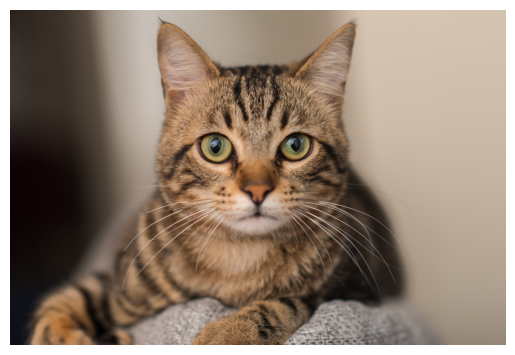

In [45]:
plt.imshow(cat_img)
plt.axis('off');

In [46]:
# Setup blurring
smallBlur = np.ones(shape=(5,5), dtype=np.float32) * (1.0/5*5)
largeBlur = np.ones(shape=(9,9), dtype=np.float32) * (1./9*9)

In [47]:
# Setup a filter for sharpening the images
sharpen = np.array([[ 0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]], dtype='int')

sharpen

array([[ 0, -1,  0],
       [-1,  5, -1],
       [ 0, -1,  0]])

In [48]:
# Setup a Laplacian kernel used to detect edge like regions
laplacian = np.array([[0, 1 , 0],
                      [1, -4, 1],
                      [0, 1, 0]], dtype='int')

laplacian

array([[ 0,  1,  0],
       [ 1, -4,  1],
       [ 0,  1,  0]])

In [49]:
# Setup a Sobel kernel to detect edge-like regions along both x and y
sobelX = np.array([[-1, 0, 1],
                   [-2,0,2],
                   [-1, 0, 1]])

sobelY = np.array([[-1, -2, -1],
                   [0,0,0],
                   [1, 2, 1]], dtype='int')

sobelX, sobelY

(array([[-1,  0,  1],
        [-2,  0,  2],
        [-1,  0,  1]]),
 array([[-1, -2, -1],
        [ 0,  0,  0],
        [ 1,  2,  1]]))

In [50]:
# Define a kernel for embossing
emboss = np.array([[-2, -1, 0],
                   [-1,1,1],
                   [0, 1, 2]], dtype='int')
emboss

array([[-2, -1,  0],
       [-1,  1,  1],
       [ 0,  1,  2]])

In [51]:
# Create a tuple of all kernels
kernel_bank = (
    ('small_blur', smallBlur),
    ('large_blur', largeBlur),
    ('sharpen', sharpen),
    ('laplacian', laplacian),
    ('sobel_x', sobelX),
    ('sobel_y', sobelY),
    ('emboss', emboss)
)

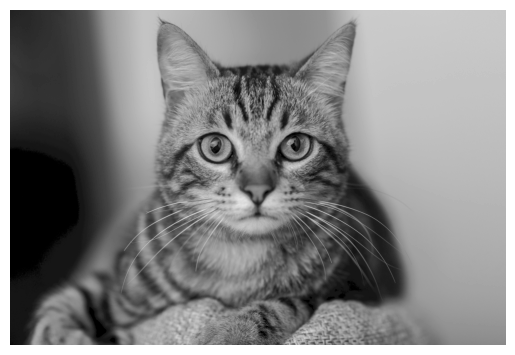

In [52]:
# Get the image using cv2
cat_image_gray = cv2.imread('c:/tmp/cat.png',  cv2.IMREAD_GRAYSCALE)
plt.imshow(cat_image_gray, cmap='gray')
plt.axis('off');


In [53]:
# Get the current shape of the image
cat_image_gray.shape

(4299, 6359)

In [54]:
# Resize the image
# https://scikit-image.org/docs/stable/auto_examples/transform/plot_rescale.html
rescaled_cat_gray = resize(cat_image_gray, (cat_image_gray.shape[0]//10, cat_image_gray.shape[1]//10), anti_aliasing = True)

# Get the image output and the new shape
rescaled_cat_gray, rescaled_cat_gray.shape

(array([[0.13272961, 0.13370177, 0.13379434, ..., 0.77975569, 0.77925536,
         0.77872326],
        [0.13284112, 0.1332708 , 0.13348458, ..., 0.77970412, 0.78038899,
         0.7786656 ],
        [0.13361021, 0.13324109, 0.13357523, ..., 0.77887462, 0.77843222,
         0.78024427],
        ...,
        [0.05102894, 0.05858392, 0.04376807, ..., 0.53780533, 0.53891955,
         0.53803086],
        [0.03735598, 0.0454025 , 0.03336872, ..., 0.53276641, 0.53753081,
         0.53656904],
        [0.02518677, 0.03543132, 0.02600922, ..., 0.53253144, 0.53480762,
         0.53392466]]),
 (429, 635))

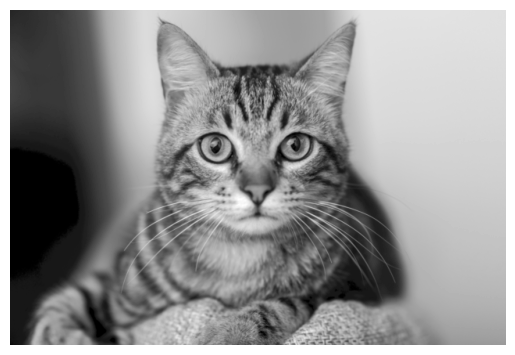

In [55]:
# Visualize the new image
# The reduced image does not look so bad ;-)
plt.imshow(rescaled_cat_gray, cmap='gray')
plt.axis('off');

[*] INFO applying small_blur


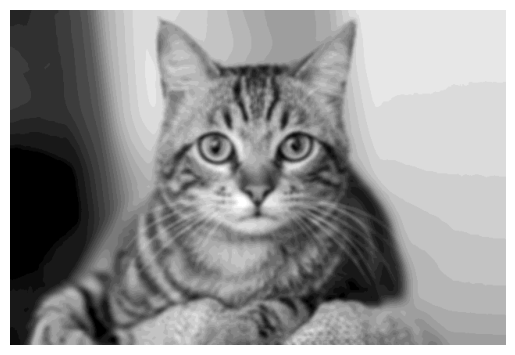

[*] INFO applying large_blur


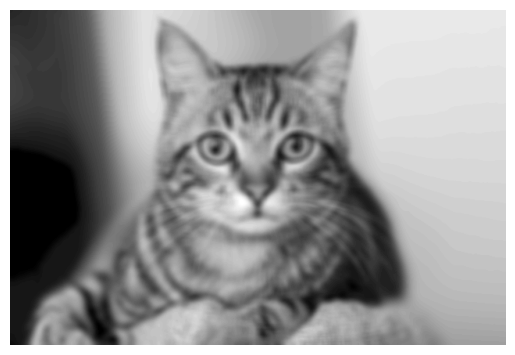

[*] INFO applying sharpen


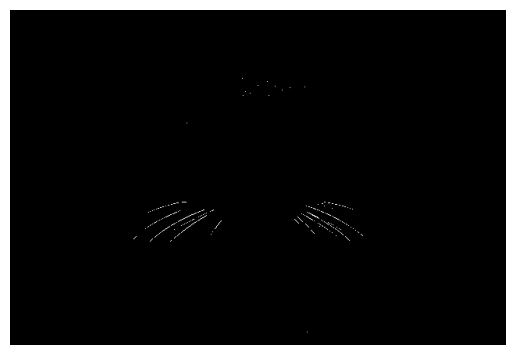

[*] INFO applying laplacian


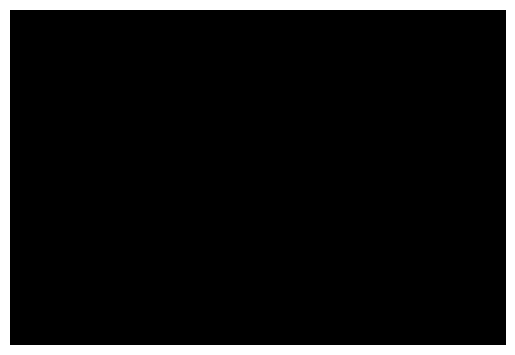

[*] INFO applying sobel_x


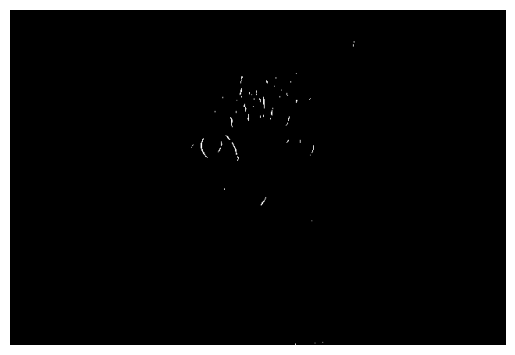

[*] INFO applying sobel_y


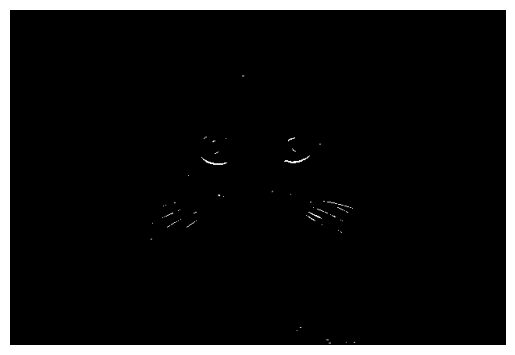

[*] INFO applying emboss


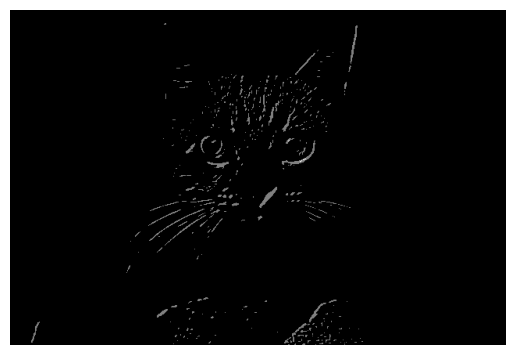

In [56]:
# Loop over the various kernels and the image
for (kernelName, K) in kernel_bank:
    #print(f'Kernel Name: {kernelName} \n\t-> K: {K}')
    print(f'[*] INFO applying {kernelName}')
    convolveOutpout = convolve(rescaled_cat_gray , K)
    convolveInput = cv2.filter2D(rescaled_cat_gray, -1, K)

    #print(f'convolveOutpout = {convolveOutpout}')
    plt.imshow(convolveOutpout, cmap='gray')
    plt.axis('off')
    plt.show()

In [57]:
# This is the second.
# https://glassboxmedicine.com/2019/07/26/convolution-vs-cross-correlation/

* Both cross-correlation and convolution are applied to images
* Cross-correlation means sliding a kernel across an image
* Convolution means sliding a flipped kernel an image
* As discussed above, the various frameworks implement cross-correlation
    - This does not change the results in practice 
    - If convolution were used instead, the same weight values would be learned in a flipped kernel
* The output from the convolution process is the convolved feature. 
    - Remember above, we reference "activation map", "feature map", "feature detector"
    - The "feature detector" was especially used when applying the activation function
* Pixel [0,0] can be chosen as the upper left hand corner, the center or some other arbitrary pixel
* 

In [58]:
# So now I close out on convolutional networks. I think I have enhanced my knowledge significantly on this topic.